The data are simulated based on real hospital administrative data for England called Hospital Episodes Statistics. Every public (National Health Service, NHS) hospital in the country must submit records for every admission; private hospitals also submit records for any NHS patients that they treat. The other UK countries and Ireland have similar databases. These can be linked to the national death registry in order to captures deaths that occur after discharge. 

Your simulated extract contains a random sample of emergency (unplanned) admissions for heart failure (ICD10 code I50). Here's a list of the fields and an explanation for some of them. Many of the fields are comorbidities coded as 0/1, where 1 indicates that the patient had it recorded. All comorbidities are recorded in HES's secondary diagnosis fields, of which there are currently 19. There are 24 fields to capture procedures and operations.

death (0/1)

los (hospital length of stay in nights)

age (in years)

gender (1=male, 2=female)

cancer

cabg (previous heart bypass)

crt (cardiac resynchronisation device - a treatment for heart failure)

defib (defibrillator implanted)

dementia

diabetes (any type)

hypertension

ihd (ischaemic heart disease)

mental_health (any mental illness)

arrhythmias

copd (chronic obstructive lung disease)

obesity

pvd (peripheral vascular disease)

renal_disease

valvular_disease (disease of the heart valves)

metastatic_cancer

pacemaker

pneumonia

prior_appts_attended (number of outpatient appointments attended in the previous year)

prior_dnas (number of outpatient appointments missed in the previous year)

pci (percutaneous coronary intervention)

stroke (history of stroke)

senile

quintile (socio-economic status for patient's neighbourhood, from 1 (most affluent) to 5 (poorest))

ethnicgroup (see below for categories)

fu_time (follow-up time, i.e. time in days since admission to hospital) 

Ethnic group has the following categories in this extract:

1=white 

2=black 

3=Indian subcontinent 

8=not known 

9=other

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter
import warnings

In [2]:
df = pd.read_csv("final.csv")

In [3]:
df

,id,death,los,age,gender,cancer,cabg,crt,defib,dementia,...,pacemaker,pneumonia,prior_appts_attended,prior_dnas,pci,stroke,senile,quintile,ethnicgroup,fu_time
0,1,0,2,90,2,0,0,0,0,0,...,0,0,4,0,0,0,0,2.0,NaN,416
1,2,0,10,74,1,0,0,0,0,0,...,0,1,9,1,0,0,0,4.0,1.0,648
2,3,0,3,83,2,0,0,0,0,0,...,0,0,1,0,0,0,0,3.0,1.0,466
3,4,0,1,79,1,0,0,0,0,0,...,1,0,9,2,1,1,0,5.0,1.0,441
4,5,0,17,94,2,0,0,0,0,0,...,0,0,3,0,0,0,0,2.0,1.0,371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,0,8,73,1,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,351
996,997,1,5,84,2,0,0,0,0,0,...,0,0,9,0,0,0,0,3.0,1.0,1030
997,998,0,3,87,1,0,0,0,0,0,...,0,0,3,0,0,0,0,4.0,1.0,15
998,999,1,62,86,2,0,0,0,0,0,...,0,1,1,0,0,0,0,2.0,1.0,339


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1000 non-null   int64  
 1   death                 1000 non-null   int64  
 2   los                   1000 non-null   int64  
 3   age                   1000 non-null   int64  
 4   gender                1000 non-null   int64  
 5   cancer                1000 non-null   int64  
 6   cabg                  1000 non-null   int64  
 7   crt                   1000 non-null   int64  
 8   defib                 1000 non-null   int64  
 9   dementia              1000 non-null   int64  
 10  diabetes              1000 non-null   int64  
 11  hypertension          1000 non-null   int64  
 12  ihd                   1000 non-null   int64  
 13  mental_health         1000 non-null   int64  
 14  arrhythmias           1000 non-null   int64  
 15  copd                  

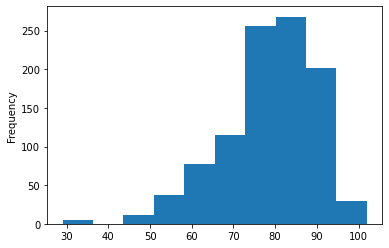

In [5]:
df.age.plot.hist()
plt.show()

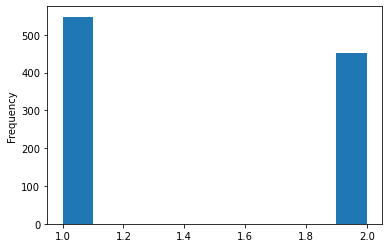

In [6]:
df.gender.plot.hist()
plt.show()

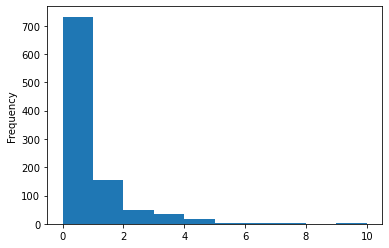

In [7]:
df.prior_dnas.plot.hist()
plt.show()

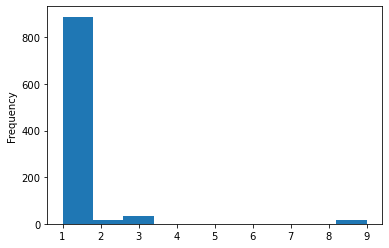

In [8]:
df.ethnicgroup.plot.hist()
plt.show()

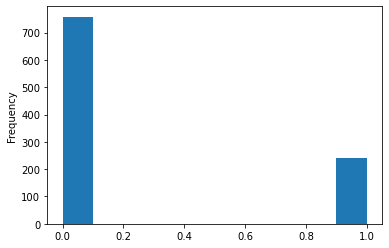

In [9]:
df.copd.plot.hist()
plt.show()

In [15]:
df.isnull().sum()

id                       0
death                    0
los                      0
age                      0
gender                   0
cancer                   0
cabg                     0
crt                      0
defib                    0
dementia                 0
diabetes                 0
hypertension             0
ihd                      0
mental_health            0
arrhythmias              0
copd                     0
obesity                  0
pvd                      0
renal_disease            0
valvular_disease         0
metastatic_cancer        0
pacemaker                0
pneumonia                0
prior_appts_attended     0
prior_dnas               0
pci                      0
stroke                   0
senile                   0
quintile                 6
ethnicgroup             43
fu_time                  0
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

id                      0
death                   0
los                     0
age                     0
gender                  0
cancer                  0
cabg                    0
crt                     0
defib                   0
dementia                0
diabetes                0
hypertension            0
ihd                     0
mental_health           0
arrhythmias             0
copd                    0
obesity                 0
pvd                     0
renal_disease           0
valvular_disease        0
metastatic_cancer       0
pacemaker               0
pneumonia               0
prior_appts_attended    0
prior_dnas              0
pci                     0
stroke                  0
senile                  0
quintile                0
ethnicgroup             0
fu_time                 0
dtype: int64

In [18]:
kmf = KaplanMeierFitter()

In [19]:
kmf.fit(durations=df.fu_time, event_observed=df.death, label = 'Kaplan Meier Estimate, full sample')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate, full sample", fitted with 951 total observations, 483 right-censored observations>

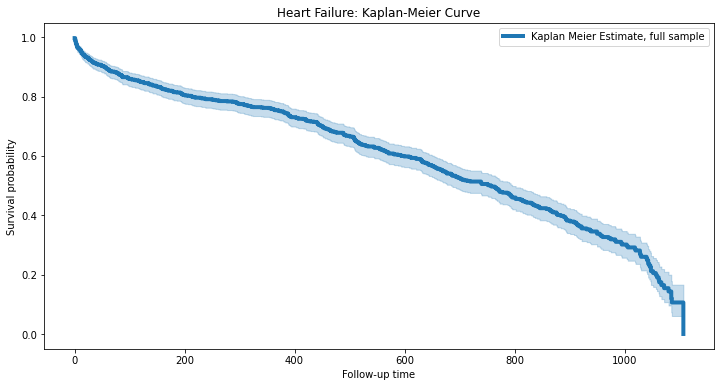

In [20]:
kmf.plot(linewidth=4, figsize=(12, 6))
plt.title('Heart Failure: Kaplan-Meier Curve')
plt.xlabel('Follow-up time')
plt.ylabel('Survival probability')
plt.show()

In [21]:
cph = CoxPHFitter()

In [25]:
cph.fit(df, duration_col="los", event_col="age")
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 951 total observations, 0 right-censored observations>
             duration col = 'los'
                event col = 'age'
      baseline estimation = breslow
   number of observations = 951
number of events observed = 951
   partial log-likelihood = -5526.46
         time fit was run = 2021-05-08 06:13:15 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
id                     0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
death                 -0.24       0.79       0.07            -0.38            -0.11                 0.69                 0.90
gender                -0.18       0.84       0.07            -0.31            -0.04                 0.73                 0.96
cancer                -0.07       0.93       0.16            -0.38             0.24                 0.69                 1.27
cabg                  -0.32       0.73       0.30            -0.90             0.27                 0.41                 1.31
crt                   -0.71       0.49       0.63            -1.93             0.52                 0.14                 1.68
defib                  0.85       2.34       0.42             0.02             1.68                 1.03                 5.36
dementia               0.07       1.07       0.17            -0.25             0.40                 0.78                 1.49
diabetes              -0.17       0.84       0.08            -0.33            -0.02                 0.72                 0.98
hypertension           0.01       1.01       0.07            -0.13             0.15                 0.88                 1.17
ihd                    0.22       1.25       0.07             0.09             0.36                 1.09                 1.44
mental_health         -0.03       0.97       0.12            -0.27             0.21                 0.77                 1.23
arrhythmias           -0.26       0.77       0.07            -0.39            -0.12                 0.68                 0.88
copd                  -0.07       0.94       0.08            -0.22             0.09                 0.80                 1.09
obesity                0.08       1.08       0.15            -0.21             0.37                 0.81                 1.44
pvd                   -0.11       0.89       0.12            -0.34             0.11                 0.71                 1.12
renal_disease         -0.12       0.88       0.08            -0.28             0.04                 0.75                 1.04
valvular_disease      -0.14       0.87       0.08            -0.29             0.01                 0.74                 1.01
metastatic_cancer      0.51       1.67       0.36            -0.19             1.21                 0.83                 3.35
pacemaker              0.17       1.18       0.19            -0.20             0.53                 0.82                 1.70
pneumonia             -0.18       0.83       0.11            -0.39             0.02                 0.68                 1.02
prior_appts_attended   0.02       1.02       0.01             0.01             0.03                 1.01                 1.03
prior_dnas            -0.07       0.93       0.03            -0.14            -0.01                 0.87                 0.99
pci                    0.10       1.11       0.21            -0.31             0.51                 0.74                 1.67
stroke                 0.36       1.43       0.24            -0.11             0.83                 0.89                 2.29
senile                -0.11       0.90       0.17            -0.44             0.22                 0.65                 1.25
quintile              -0.02       0.98       0.02            -0.06             0.03                 0.94               